<a href="https://colab.research.google.com/github/Swatantrakumar-data/machine_leaning/blob/main/project_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import the basic libraries required.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import time
import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#2. Read the datafile as dataframe.

In [3]:
data = pd.read_csv("/content/drive/MyDrive/hour - hour.csv")
data.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

#3. Check for any Null values.

In [4]:
data.shape

(17379, 17)

In [10]:
data = data.drop('instant',axis = 1)

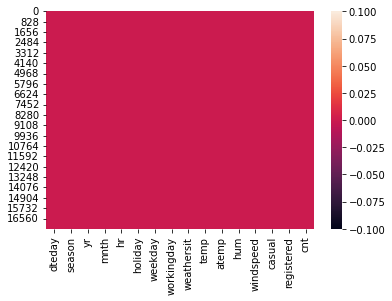

In [ ]:
sns.heatmap(data.isnull())

#4. Check the datatype of the dataframe.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


#5. Convert dte coulmn to datetime datatype.

In [5]:
data['dteday'] = pd.to_datetime(data['dteday'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#6. Build a Correlation Matrix between counts and features.

In [7]:
data.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

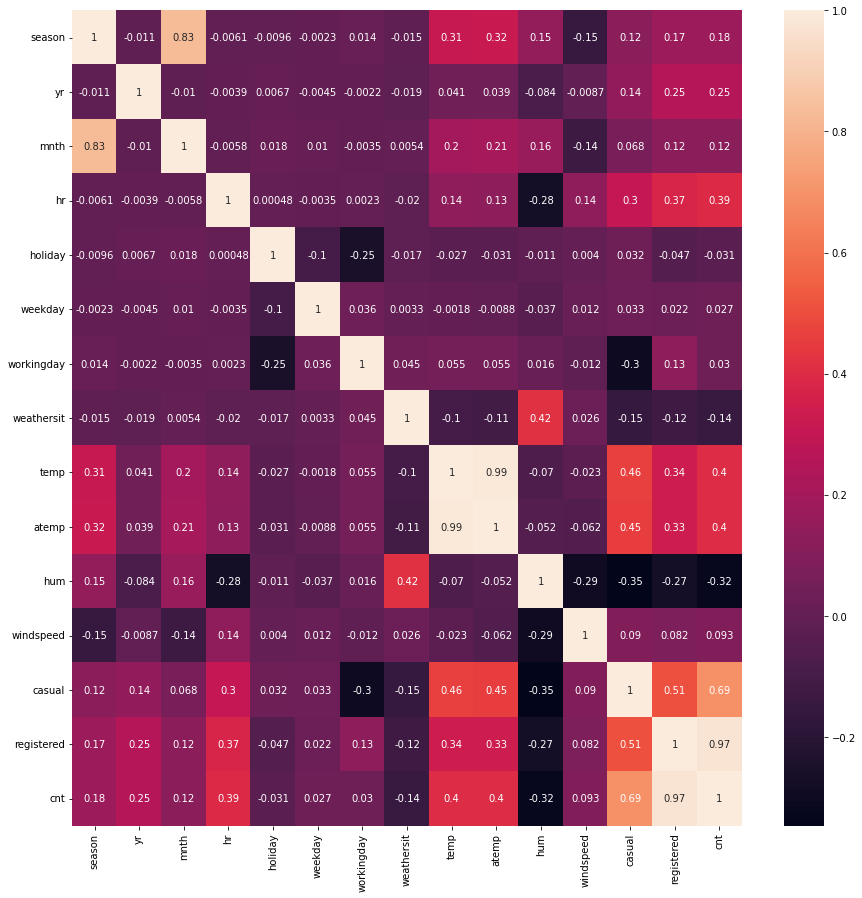

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True)
plt.show()

#7. Outlier Visualization

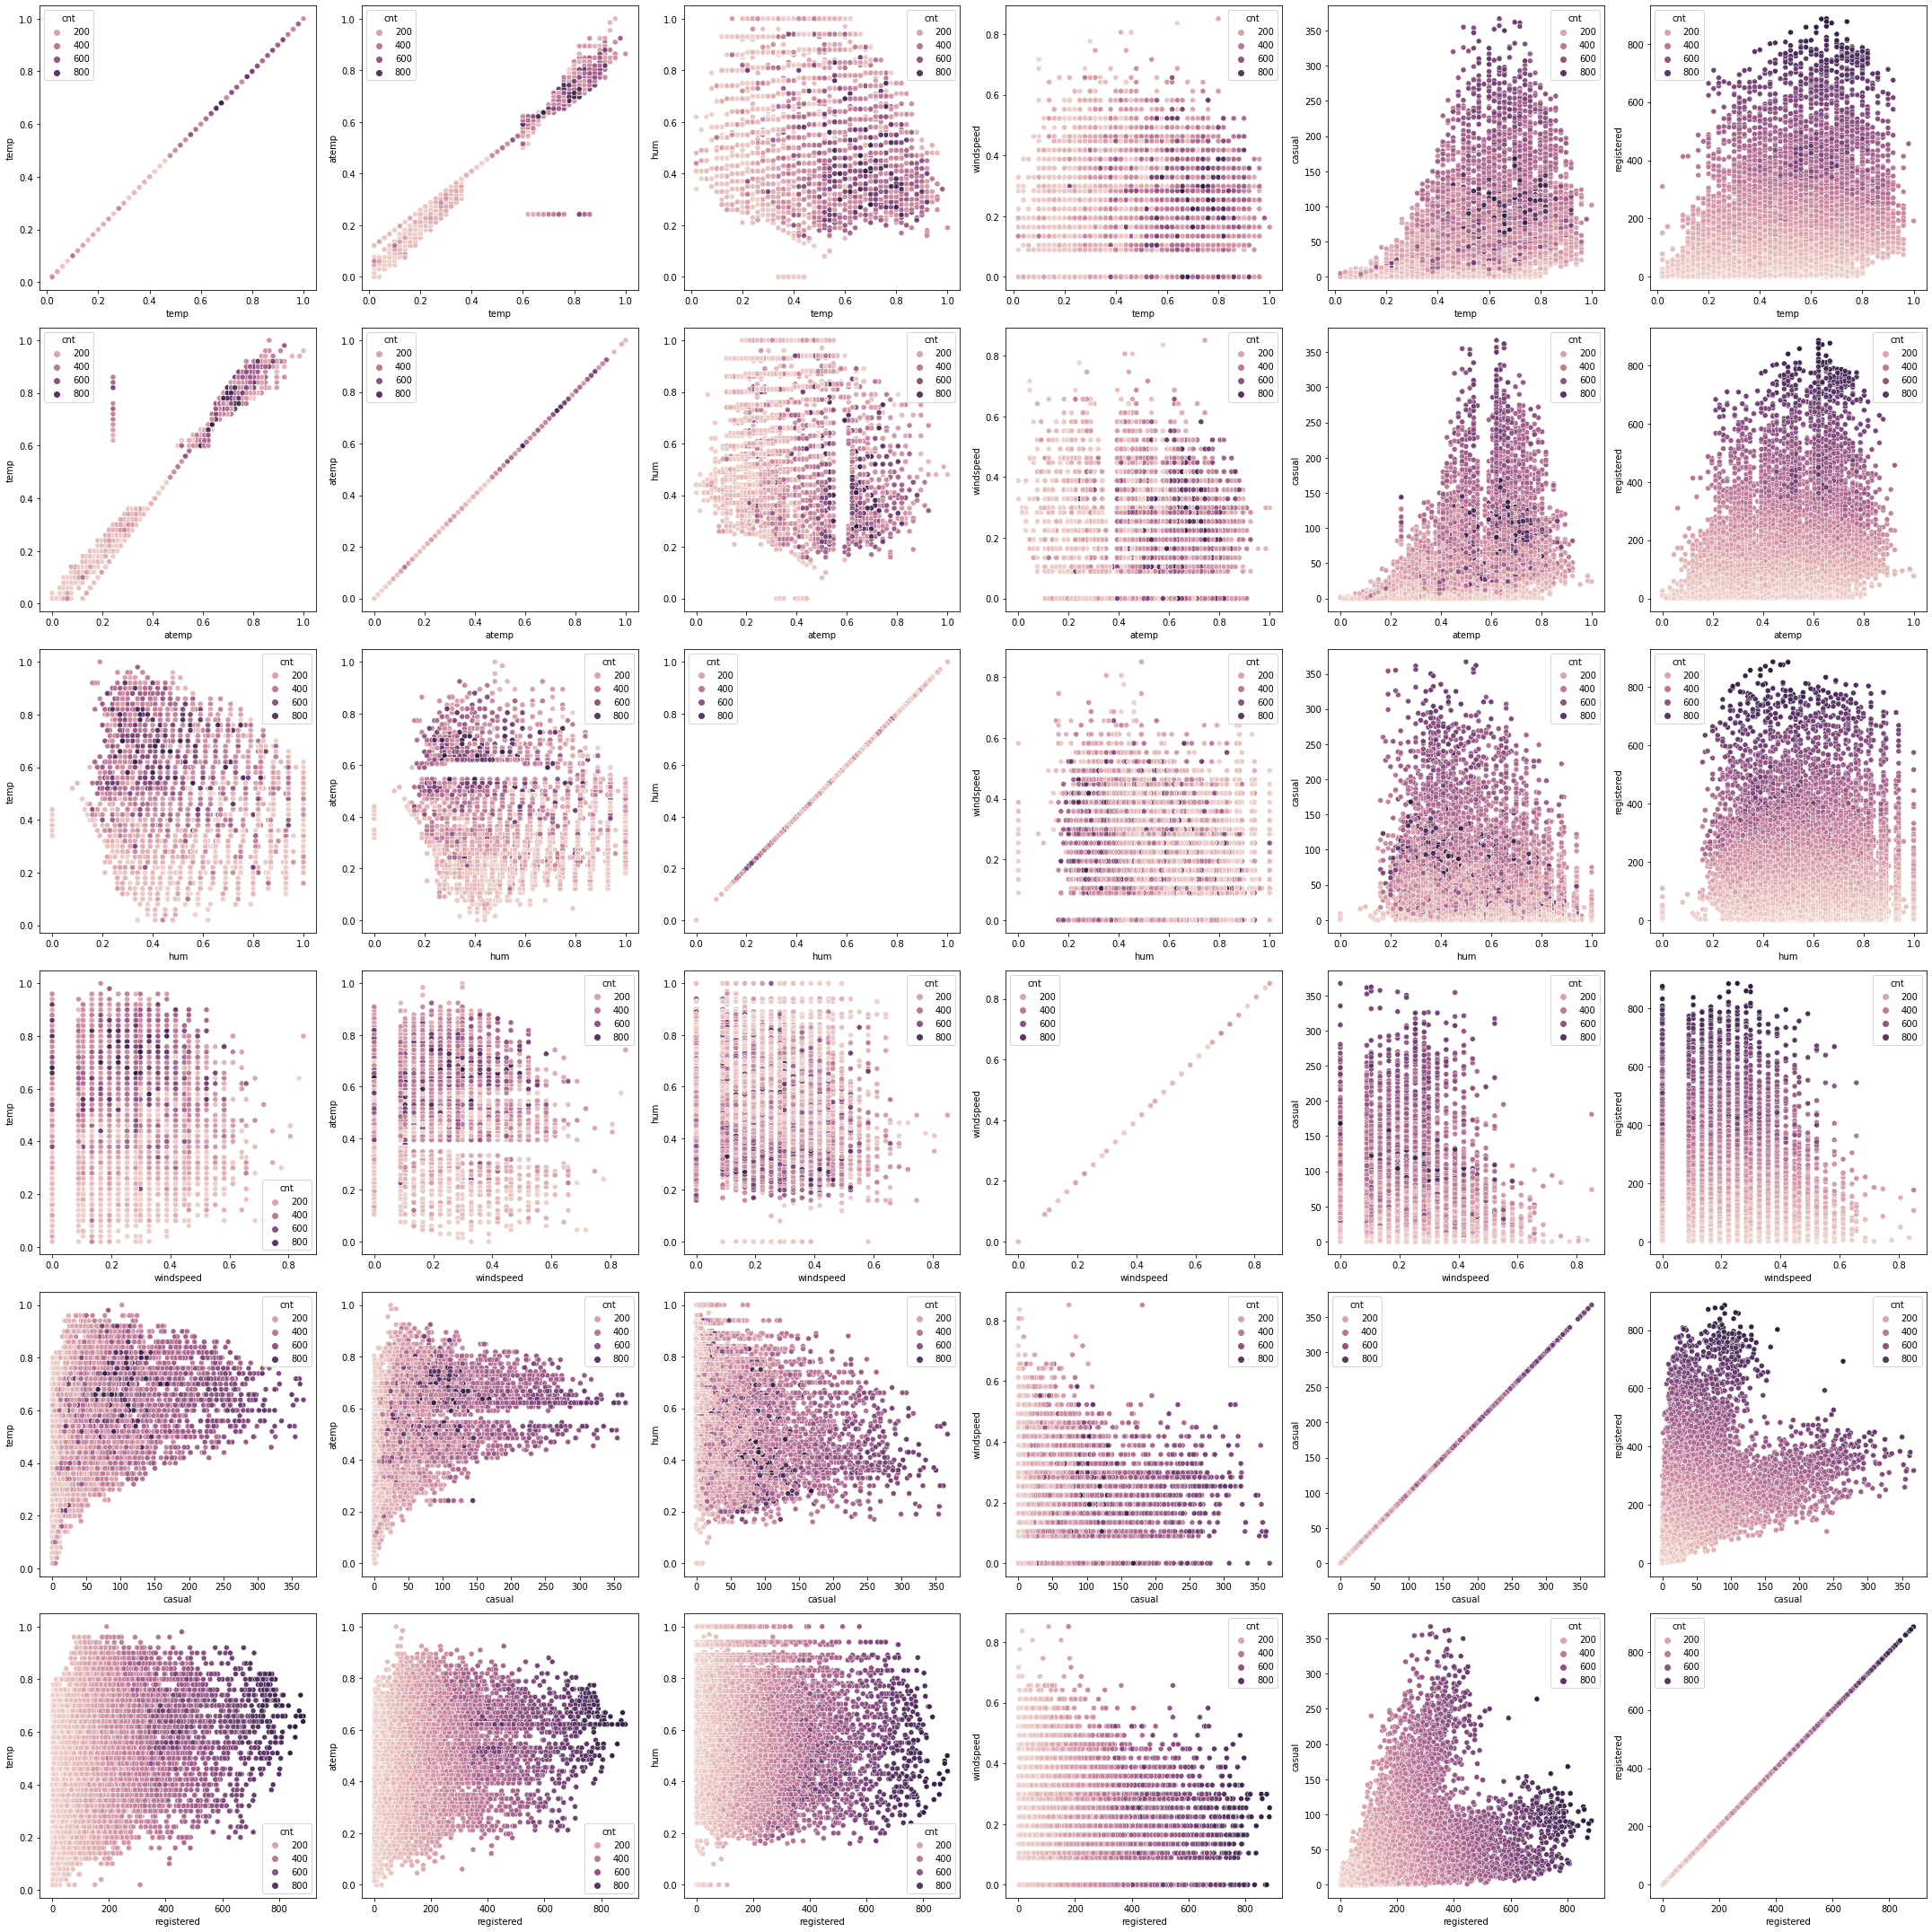

In [ ]:
Numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']       # FOR CONTINEOUS DATA
target = 'cnt'
k = 0
plt.figure(figsize = (30,30))
for i, feature1 in enumerate(Numerical_features):
  for j, feature2 in enumerate(Numerical_features):
    s = k+j+1
    plt.subplot(6,6,s)
    sns.scatterplot(x = feature1, y = feature2 , data = data, hue = target)
    plt.tight_layout()
  k = s
plt.show()
plt.close()

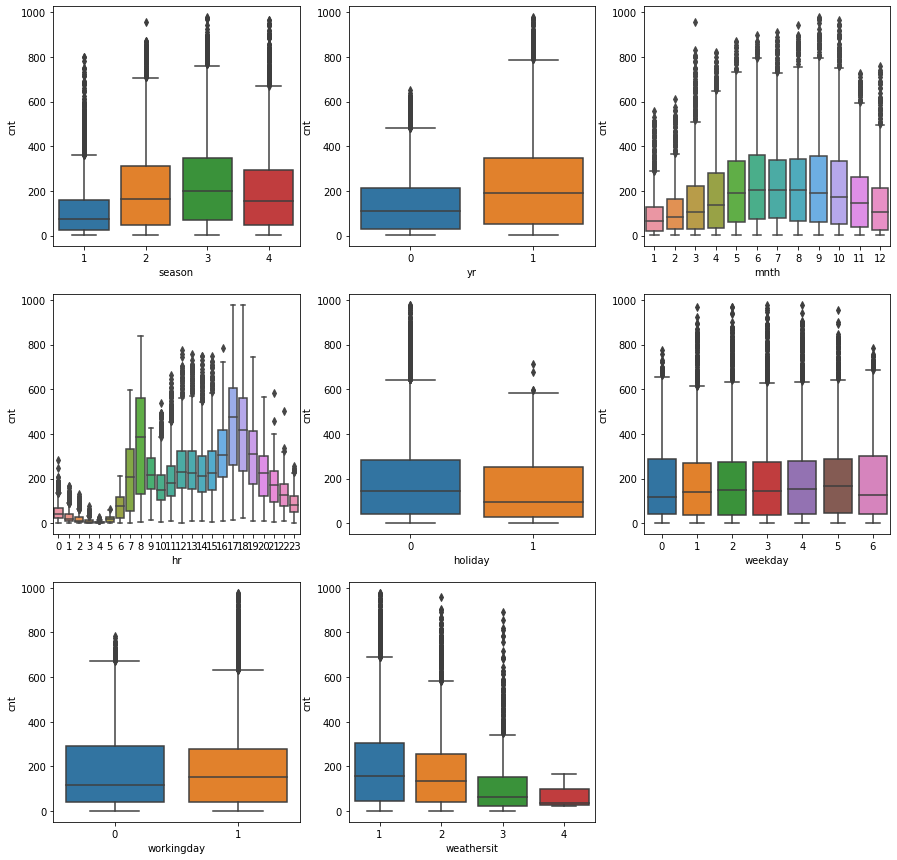

In [ ]:
discrete_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']    # FOR CATEGORICAL DATA
target = 'cnt'
plt.figure(figsize = (15,15))
for i, feature in enumerate(discrete_features):
  plt.subplot(3,3,i+1)
  sns.boxplot(x = feature, y = target,data = data)
plt.show()
plt.close()

#8. Number of bikes rented on a casual basis per season yearly.

In [ ]:
t = data.groupby(['yr','season'])['casual'].sum()


In [ ]:
l = []
for i in data['yr'].unique():
  l1 = []
  for j in data['season'].unique():

    l1.append(t[i][j])
  l.append(l1)
l
  

[[21425, 77564, 95450, 52813], [39197, 125958, 130641, 76969]]

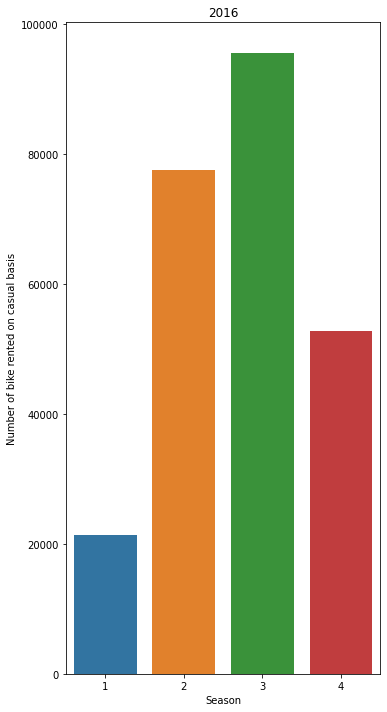

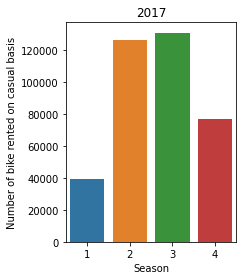

In [ ]:
year = {0:2016,1:2017}
plt.figure(figsize = (10,10))
for i,val in enumerate(l):
  plt.subplot(1,2,i+1)
  sns.barplot(x= data['season'].unique(),y = val)
  plt.xlabel('Season')
  plt.ylabel('Number of bike rented on casual basis')
  plt.title(year[i])
  plt.tight_layout()
  plt.show()

#9. Number of bikes rented on a registered basis per season yearly.

In [ ]:
t = data.groupby(['yr','season'])['registered'].sum()

l = []
for i in data['yr'].unique():
  l1 = []
  for j in data['season'].unique():

    l1.append(t[i][j])
  l.append(l1)
l

[[128575, 269752, 324200, 273324], [282151, 445315, 510838, 438507]]

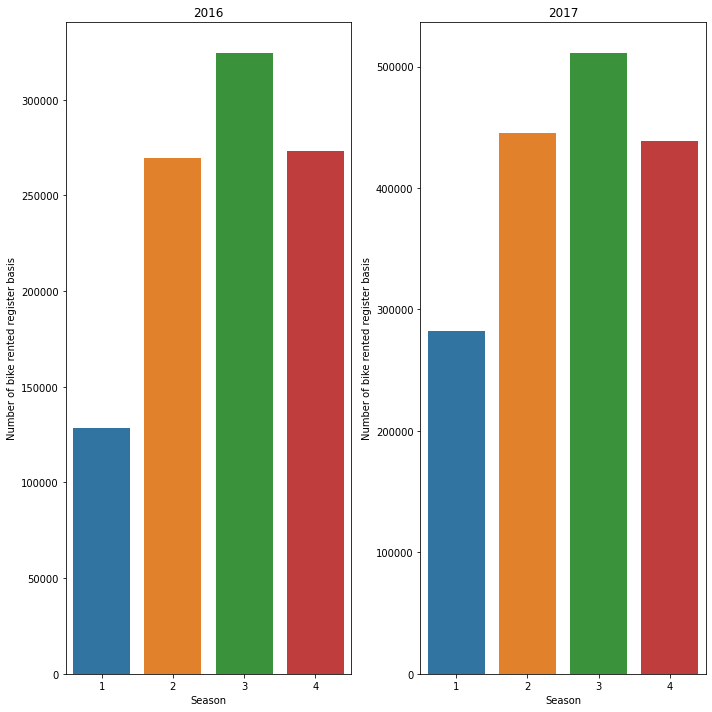

In [ ]:
year = {0:2016,1:2017}
plt.figure(figsize = (10,10))
for i,val in enumerate(l):
  plt.subplot(1,2,i+1)
  sns.barplot(x= data['season'].unique(),y = val)
  plt.xlabel('Season')
  plt.ylabel('Number of bike rented register basis')
  plt.title(year[i])
  plt.tight_layout()
plt.show()

#10. Total ‘cnt’ bikes rented

In [ ]:
data['cnt'].sum()

3292679

#11. Examine the renting behavior seasonally

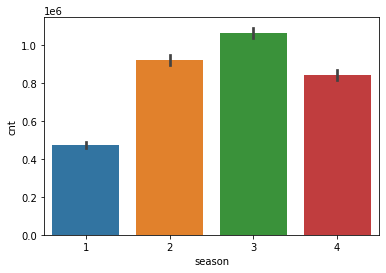

In [ ]:
sns.barplot(x = 'season', y = 'cnt', data = data, estimator = np.sum)

#12. Which month of each season has the highest rent and how is the weather
#predicting on rents?

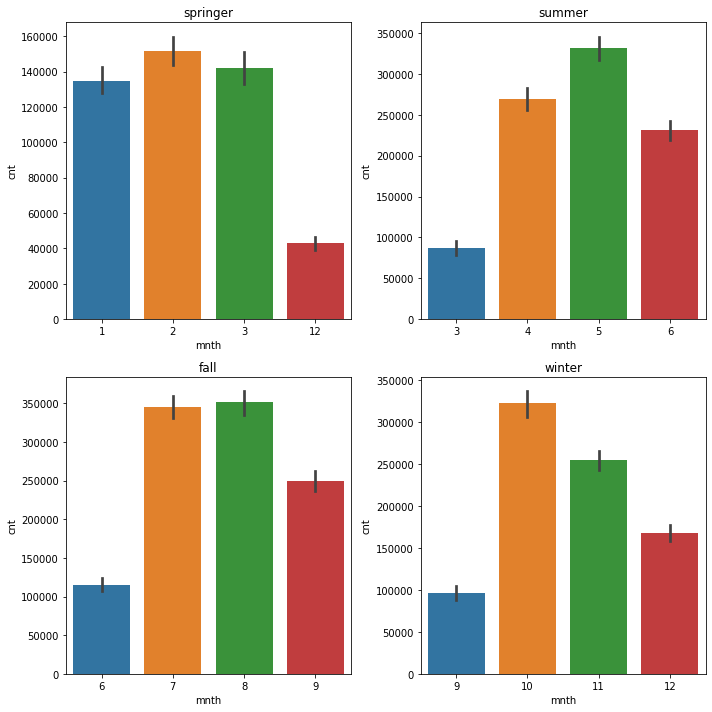

In [ ]:
season = {1:'springer', 2:'summer', 3:'fall',4:'winter'}
plt.figure(figsize = (10,10))
for i, val in enumerate(data['season'].unique()):
  d = data[data['season'] == val]
  plt.subplot(2,2,i+1)
  sns.barplot(x = 'mnth', y = 'cnt', data = d, estimator = np.sum)
  plt.title(season[i+1])
  plt.tight_layout()
plt.show()
plt.close()

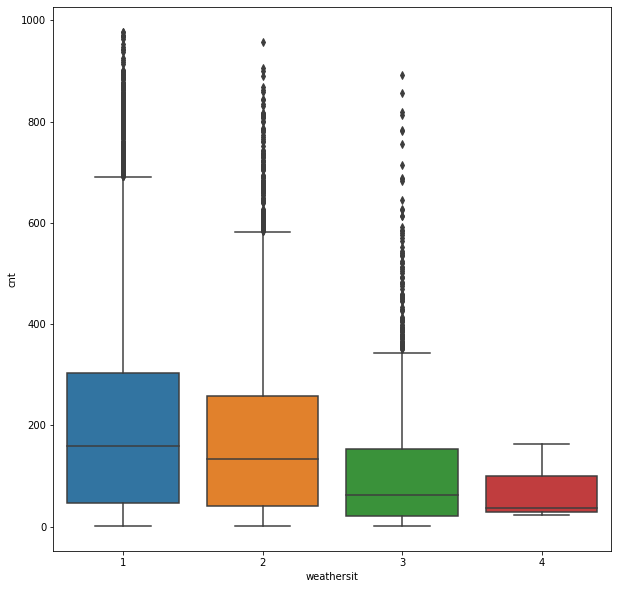

In [ ]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'weathersit', y='cnt', data = data)
plt.show()

#13. Demand of Bicycle across the month

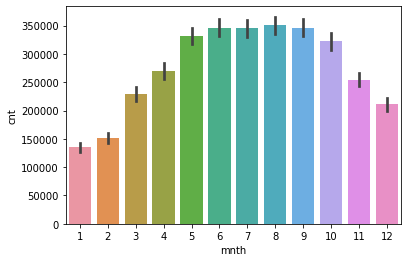

In [ ]:
sns.barplot(x = 'mnth', y = 'cnt', data = data, estimator = np.sum)

#14. Demand of bike across seasons

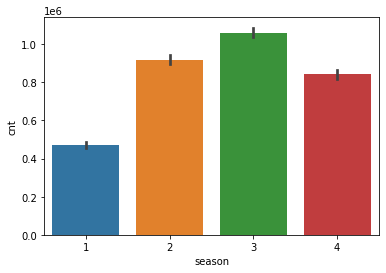

In [ ]:
sns.barplot(x = 'season', y = 'cnt', data = data, estimator = np.sum)

#15. Skewness in distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

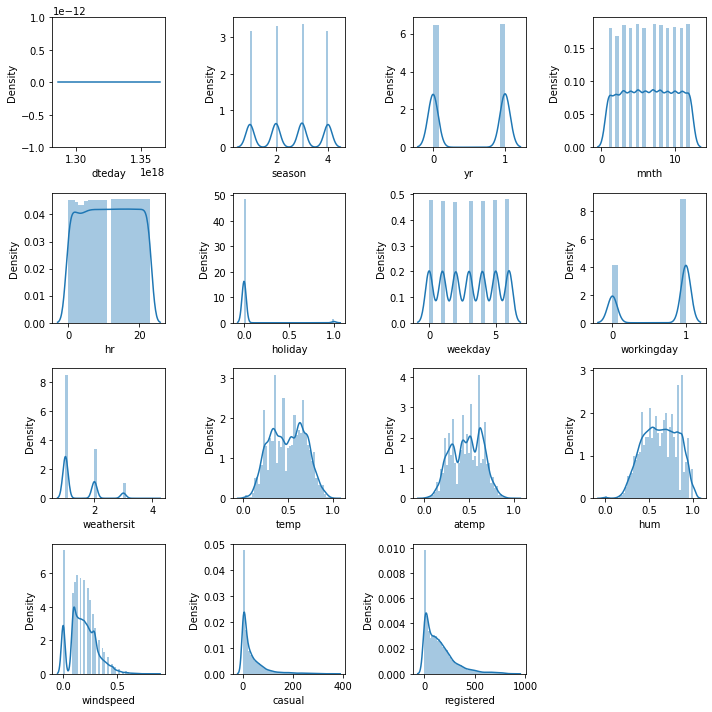

In [ ]:
f = data.columns[:-1].to_list()
plt.figure(figsize = (10,10))
for i,feature in enumerate(f):
  plt.subplot(4,4,i+1)
  sns.distplot(data[feature])
  plt.tight_layout()
plt.show()
plt.close()

#16. Dummy Variable creation

In [11]:
feature_cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
data1 = pd.get_dummies(data = data, columns = feature_cat, drop_first = True)

In [12]:
data1.head()

dteday  hr  temp   atemp   hum  windspeed  casual  registered  cnt  \
0 2011-01-01   0  0.24  0.2879  0.81        0.0       3          13   16   
1 2011-01-01   1  0.22  0.2727  0.80        0.0       8          32   40   
2 2011-01-01   2  0.22  0.2727  0.80        0.0       5          27   32   
3 2011-01-01   3  0.24  0.2879  0.75        0.0       3          10   13   
4 2011-01-01   4  0.24  0.2879  0.75        0.0       0           1    1   

   season_2  ...  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
0         0  ...          0          0          0          0          0   
1         0  ...          0          0          0          0          0   
2         0  ...          0          0          0          0          0   
3         0  ...          0          0          0          0          0   
4         0  ...          0          0          0          0          0   

   weekday_6  workingday_1  weathersit_2  weathersit_3  weathersit_4  
0          1             0             0             0             0  
1          1             0             0             0             0  
2          1             0             0             0             0  
3          1             0             0             0             0  
4          1             0             0             0             0  

[5 rows x 35 columns]

# 17 drop unwanted columns

In [13]:
data1 =data1.drop(['dteday','atemp'], axis =1)

#17. Standardization of continuous numerical variables Mean: 0, standard deviation is: 1

In [14]:
X = data1.drop('cnt',axis=1)
y = data1['cnt']
sc = MinMaxScaler()
X = sc.fit_transform(X)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


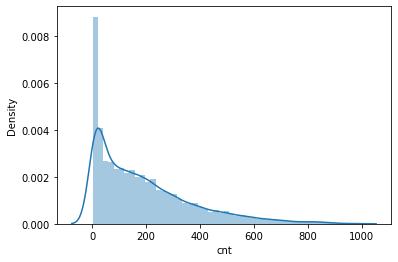

In [ ]:
sns.distplot(data1['cnt'])         # data distributed in negative exponential way , but we need normal curve

In [ ]:
data1['cnt'] = np.log(data1['cnt'])          # TO NORMALISE THE DATA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


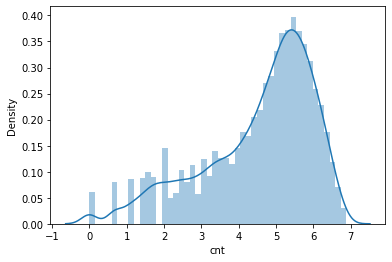

In [ ]:
sns.distplot(data1['cnt'])  

In [26]:
t1 = time.time()
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f" test data accuracy {model.score(x_test, y_test)}")
print(f" train data accuracy {model.score(x_train, y_train)}")
print(f"RMSE VALUE : {rmse}")
print(f"time taken is {(time.time() - t1) * 1000} in milisecond")

 test data accuracy 0.9999997657681253
 train data accuracy 1.0
RMSE VALUE : 0.08839923344713405
time taken is 752.5825500488281 in milisecond


In [17]:
t1 = time.time()
poly = PolynomialFeatures(degree = 2)
x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f" test data accuracy {model.score(x_test, y_test)}")
print(f" train data accuracy {model.score(x_train, y_train)}")
print(f"RMSE VALUE : {rmse}")
print(f"time taken is {(time.time() - t1) * 1000} in milisecond")

 test data accuracy 0.9999997657681253
 train data accuracy 1.0
RMSE VALUE : 0.08839923344713405
time taken is 898.7209796905518 in milisecond


In [18]:
dt_model = DecisionTreeRegressor()

max_depth_ = [5,8,10,13,16,18]
param_grid = dict(max_depth = max_depth_)
gs_cv = GridSearchCV(dt_model, param_grid, cv = 4)
gs_cv.fit(x_train, y_train)
print(gs_cv.best_params_)

{'max_depth': 16}


In [19]:
t1 = time.time()
dt_model = DecisionTreeRegressor(max_depth = 16)
dt_model.fit(x_test, y_test)
y_pred = dt_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f" test data accuracy {dt_model.score(x_test, y_test)}")
print(f" train data accuracy {dt_model.score(x_train, y_train)}")
print(f"RMSE VALUE : {rmse}")
print(f"time taken is {(time.time() - t1) * 1000} in milisecond")

 test data accuracy 0.9999999870651771
 train data accuracy 0.9976085919900954
RMSE VALUE : 0.02077331208116881
time taken is 288.4554862976074 in milisecond


In [23]:
t1 = time.time()
rf_model = RandomForestRegressor(n_estimators=100, max_depth=7)
rf_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f" test data accuracy {rf_model.score(x_test, y_test)}")
print(f" train data accuracy {rf_model.score(x_train, y_train)}")
print(f"RMSE VALUE : {rmse}")
print(f"time taken is {(time.time() - t1) * 1000} in milisecond")

 test data accuracy 0.9991341590694018
 train data accuracy 0.9993200050412104
RMSE VALUE : 0.02077331208116881
time taken is 41524.855613708496 in milisecond
